Problem Statement 1:
    
A retail store that has multiple outlets across the country are facing issues in managing the
inventory - to match the demand with respect to supply.

Dataset Information:
    
The walmart.csv contains 6435 rows and 8 columns.

--Feature   Name Description

--Store     Store number

--Date      Week of Sales

--Weekly_Sales    Sales for the given store in that week

--Holiday_Flag    If it is a holiday week

--Temperature     Temperature on the day of the sale

--Fuel_Price      Cost of the fuel in the region

--CPI Consumer    Price Index

--Unemployment    Unemployment Rate

In [ ]:
# Importing the Important Libraires..

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load the datasets...

data=pd.read_csv('/content/drive/MyDrive/Walmart.csv')

# Performming the EDA...


In [ ]:
# First look of Data...
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
# Check the Unique feature of data
data.nunique()

,0
Store,45
Date,143
Weekly_Sales,6435
Holiday_Flag,2
Temperature,3528
Fuel_Price,892
CPI,2145
Unemployment,349


In [ ]:
# To see the first 5 records of our data...
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# checking the Null value...

data.isnull().sum()

,0
Store,0
Date,0
Weekly_Sales,0
Holiday_Flag,0
Temperature,0
Fuel_Price,0
CPI,0
Unemployment,0


In [ ]:
# checking the duplicate values..

data.duplicated().sum()

0

In [ ]:
data.head(2)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106


In [ ]:
# here we performing the feature enginearing on date. we can seprate Date as day,date,month & year

data['Day']=data['Date'].str.split('-').str[0]
data['Month']=data['Date'].str.split('-').str[1]
data['year']=data['Date'].str.split('-').str[2]
data.drop(['Date'],axis=1,inplace=True)
data

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
# checking the outliers...

col=data.columns

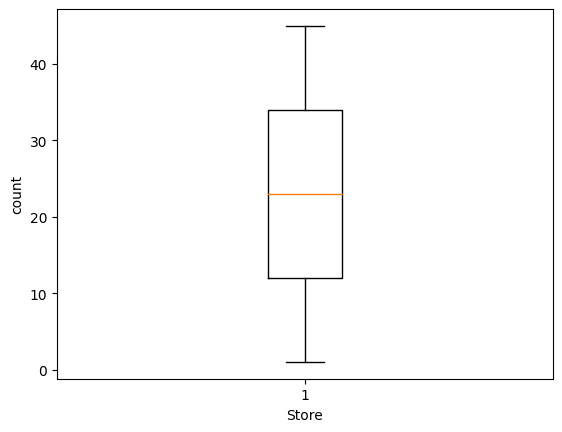

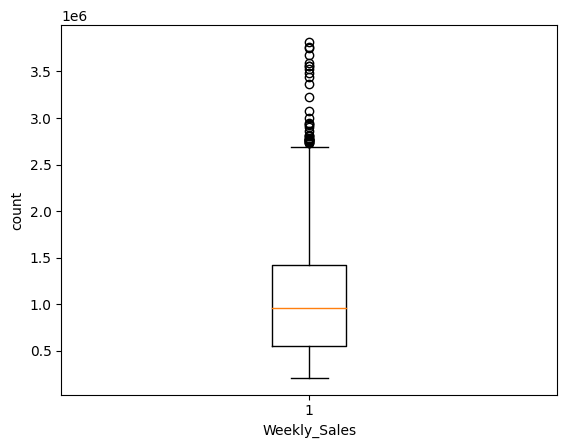

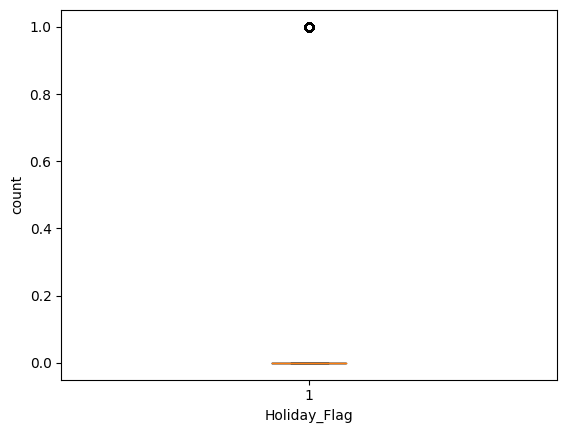

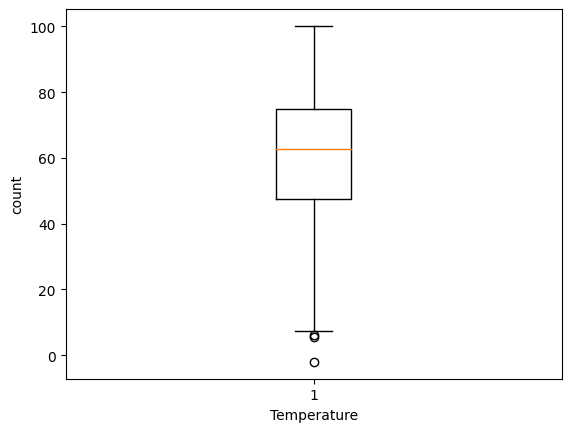

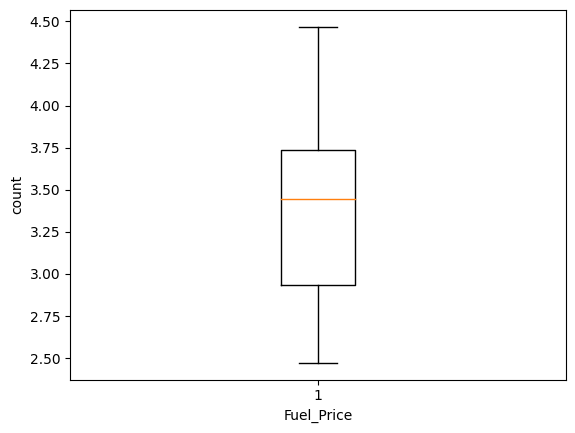

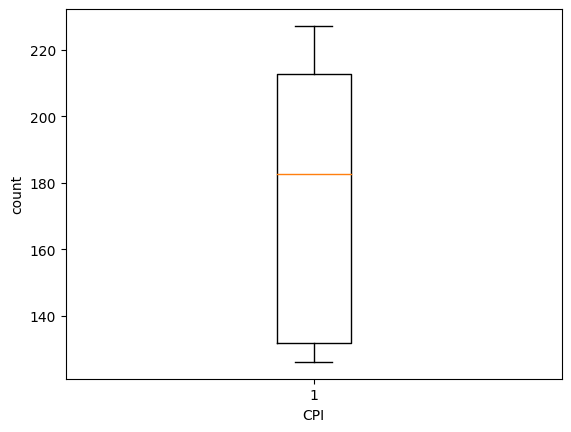

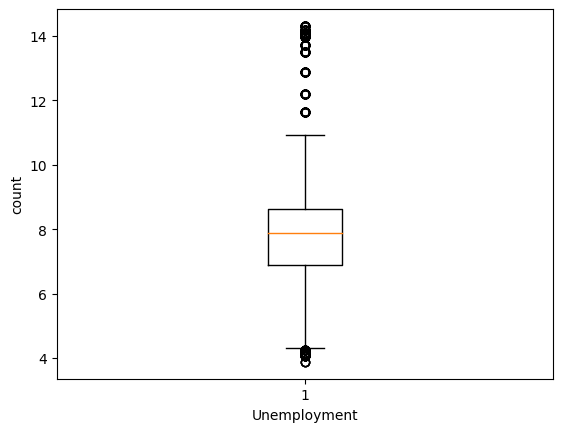

In [ ]:
# perform the Outlier detection in Numerical Data..

for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
# IQR -InterQuartile Range...

out_col=('Weekly_Sales','Temperature','Unemployment')

In [ ]:
#Checking holiday Flag for Outliers...

data['Holiday_Flag'].value_counts()

,count
Holiday_Flag,
0,5985
1,450


In [ ]:
# Calculate the Outliers by IQR method..
for i in out_col:
    Q1=data[i].quantile(0.25)
    Q3=data[i].quantile(0.75)
    IQR=Q3-Q1
    LQR=Q1-1.5*IQR
    UQR=Q3+1.5*IQR
    data=data[(data[i]<=UQR)&(data[i]>=LQR)]

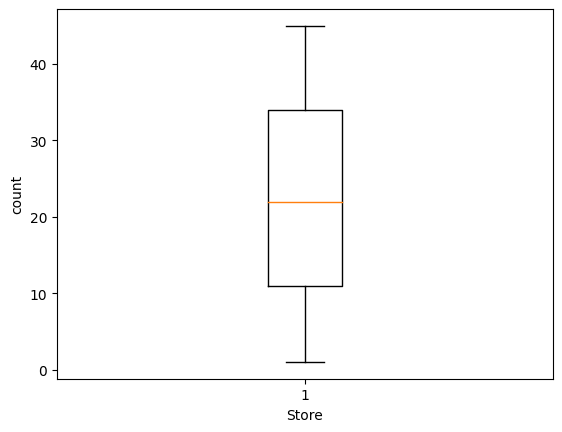

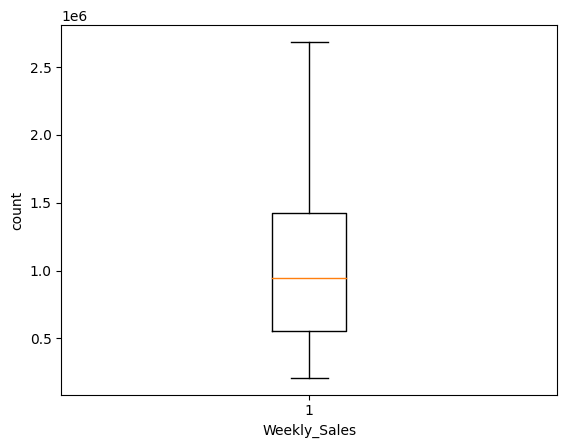

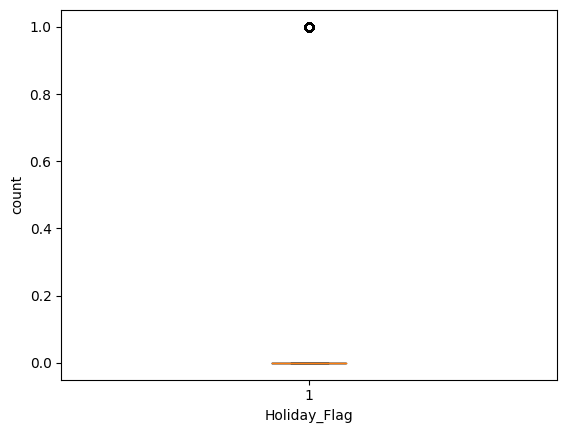

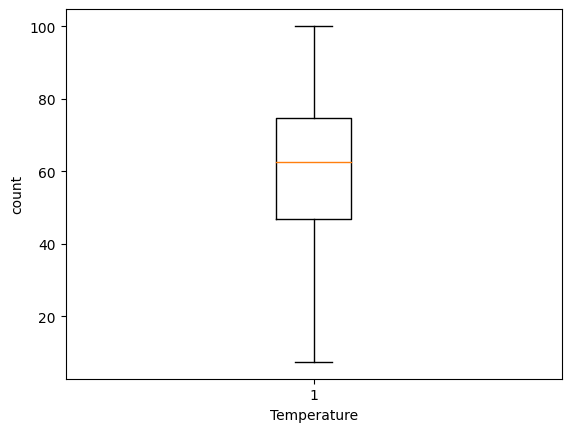

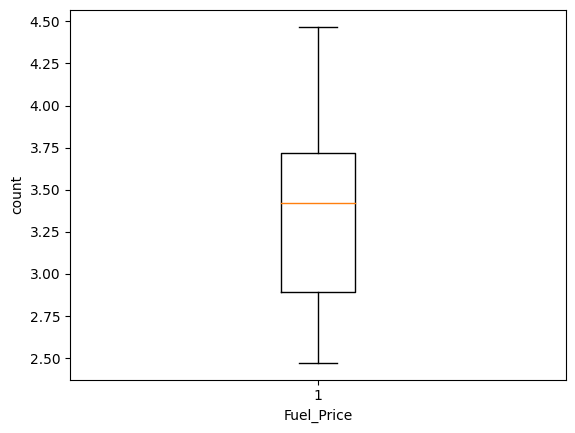

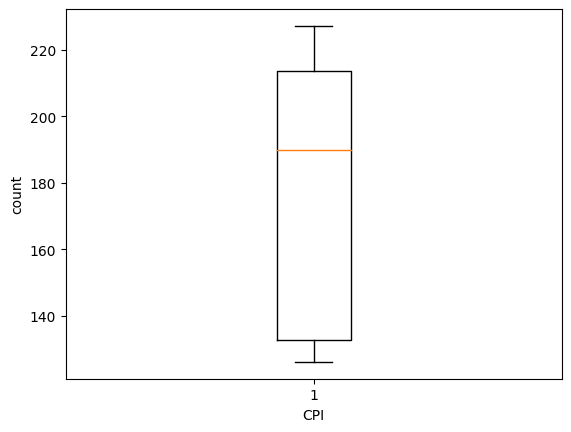

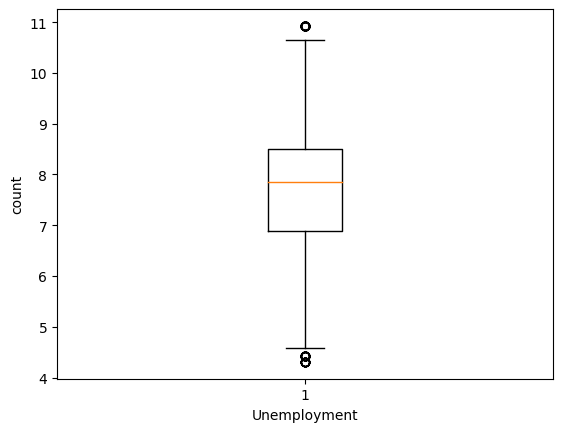

In [ ]:
# Recheck the Outliers on performed features...
for col_name in col:
    if(data[col_name].dtypes!='object'):
        plt.boxplot(data[col_name])
        plt.xlabel(col_name)
        plt.ylabel('count')
        plt.show()

In [ ]:
# after Outlier Removal we have the below data...
data.head(4)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5917 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         5917 non-null   int64  
 1   Weekly_Sales  5917 non-null   float64
 2   Holiday_Flag  5917 non-null   int64  
 3   Temperature   5917 non-null   float64
 4   Fuel_Price    5917 non-null   float64
 5   CPI           5917 non-null   float64
 6   Unemployment  5917 non-null   float64
 7   Day           5917 non-null   object 
 8   Month         5917 non-null   object 
 9   year          5917 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 637.5+ KB


In [ ]:
# Data Distribution in Categorica & Numerical

col=data.columns
col

categorical_feature=[]
numerical_feature=[]

for col_name in col:
    if data[col_name].dtypes=='object':
        categorical_feature.append(col_name)
    else:
        numerical_feature.append(col_name)
print(categorical_feature)
print(numerical_feature)

['Day', 'Month', 'year']
['Store', 'Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']


In [ ]:
# Checking the basis Statistic on data..

data.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,5917.000000,5.917000e+03,5917.000000,5917.000000,5917.000000,5917.000000,5917.000000
mean,22.801251,1.039313e+06,0.069123,60.433407,3.340543,175.023148,7.722305
std,13.094060,5.519450e+05,0.253684,18.386455,0.458200,39.023139,1.243337
min,1.000000,2.099862e+05,0.000000,7.460000,2.472000,126.064000,4.308000
25%,11.000000,5.525292e+05,0.000000,46.980000,2.891000,132.767067,6.891000
50%,22.000000,9.472292e+05,0.000000,62.620000,3.420000,190.006988,7.852000
75%,34.000000,1.427624e+06,0.000000,74.730000,3.721000,213.799099,8.494000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,10.926000


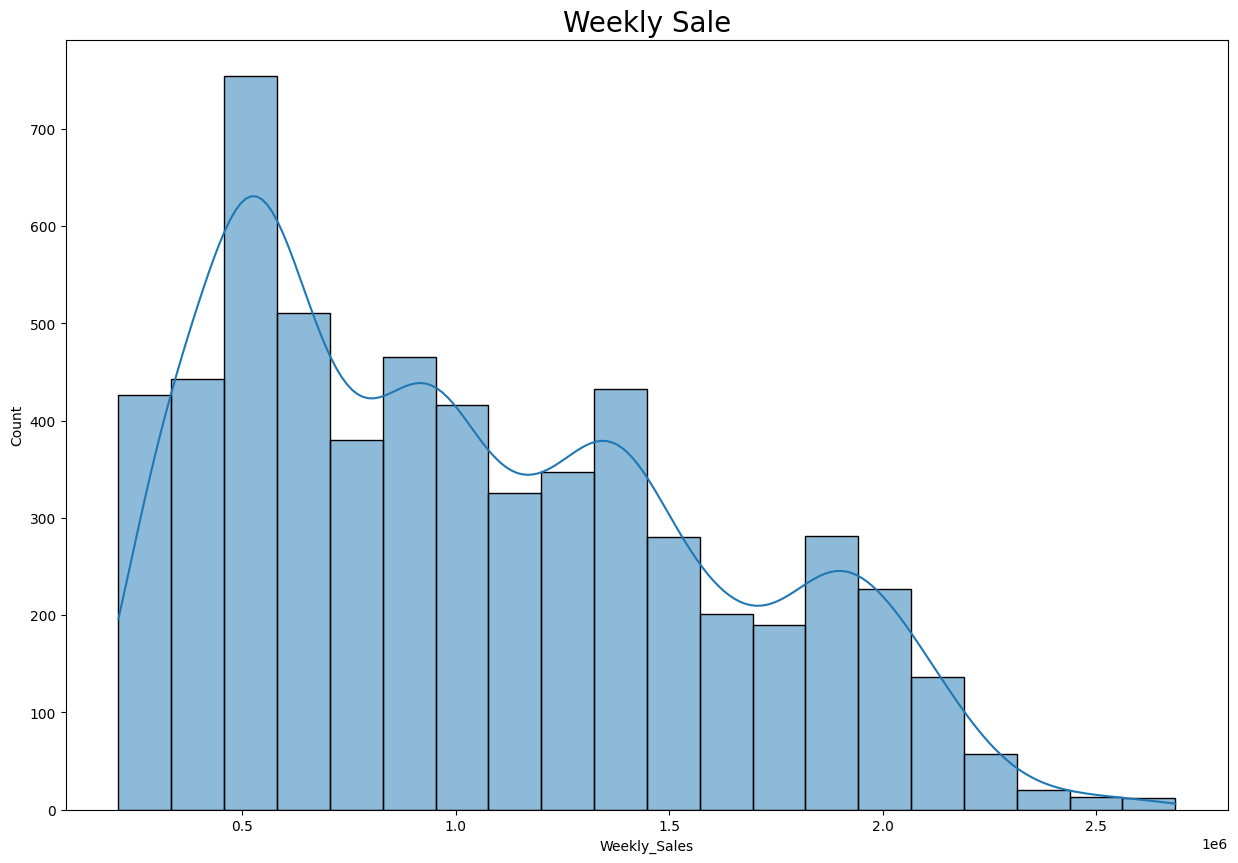

In [ ]:
#Plotting on Weeklkly Sales
plt.figure(figsize=(15,10))
ax=sns.histplot(data['Weekly_Sales'],kde=True,bins=20)
plt.title('Weekly Sale',fontsize=20)
plt.show()

# in above graph shows that our weekly sales is not normally distributed, its skewed to right

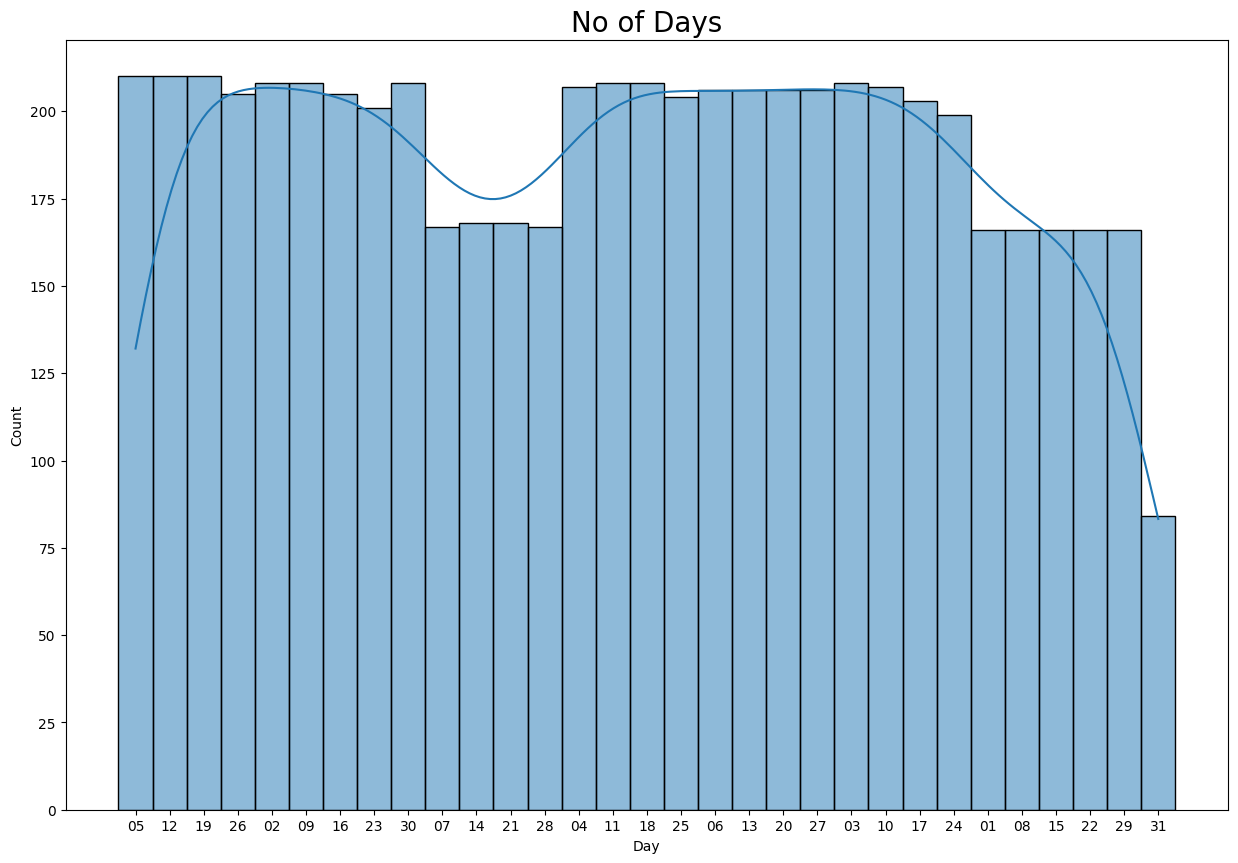

In [ ]:
# Ploting on Caterogical Data..

# Day wise sales

plt.figure(figsize=(15,10))
ax=sns.histplot(data['Day'],kde=True,bins=20)
plt.title('No of Days',fontsize=20)
plt.show()


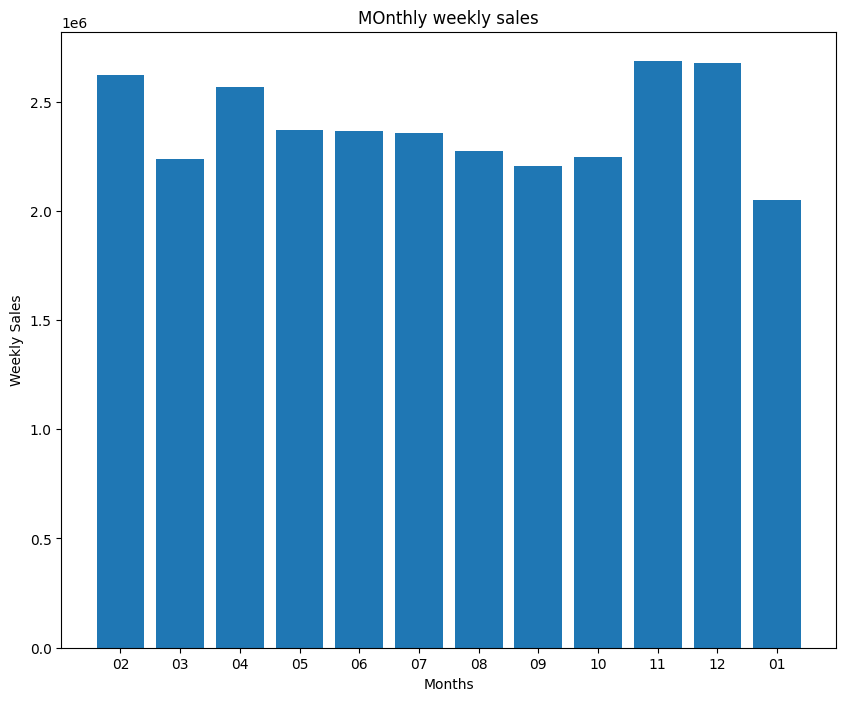

In [ ]:
# MOnth Wise Sale

plt.figure(figsize=(10,8))
plt.bar(data['Month'],data['Weekly_Sales'])
plt.xlabel('Months')
plt.ylabel('Weekly Sales')
plt.title('MOnthly weekly sales')
plt.show()

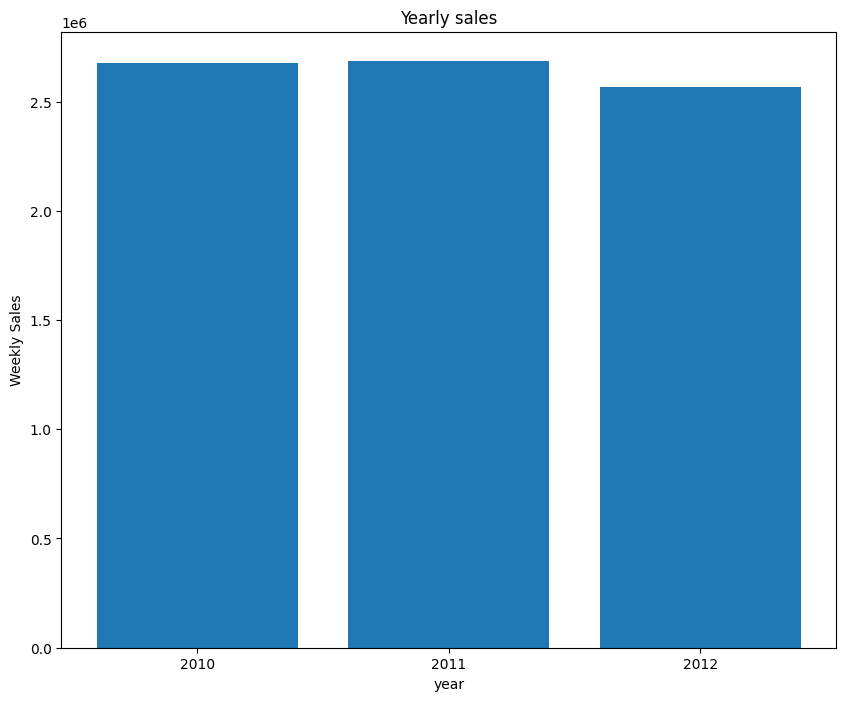

In [ ]:
# Yearly sale


plt.figure(figsize=(10,8))
plt.bar(data['year'],data['Weekly_Sales'])
plt.xlabel('year')
plt.ylabel('Weekly Sales')
plt.title('Yearly sales')
plt.show()

In [ ]:
# Per above plot we can see in year 2012 walmart store has less thansactions other than year 2010 & 2011

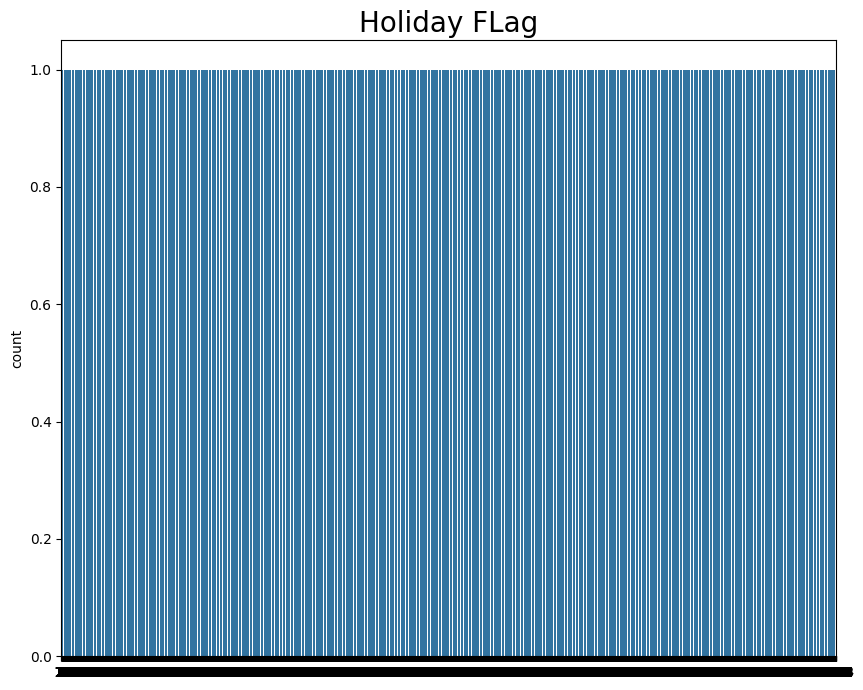

In [ ]:
# Plotting on Numerical Data....

# Holiday Flag

plt.figure(figsize=(10,8))
ax=sns.countplot(data['Holiday_Flag'],)
plt.title('Holiday FLag',fontsize=20)
plt.show()

# as per above graph we consider that 0 for no holiday and 1 is for holday. People wants to go more in non holidays

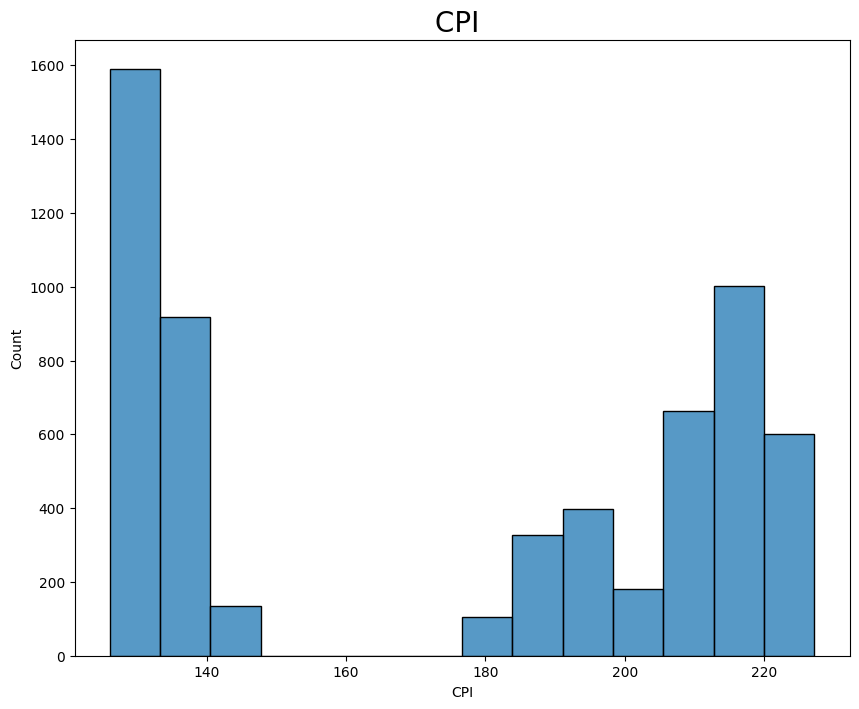

In [ ]:
# CPI plotting...

plt.figure(figsize=(10,8))
ax=sns.histplot(data['CPI'],)
plt.title('CPI ',fontsize=20)
plt.show()

In [ ]:

# in above plot people have 0 t0 120 have more CPI

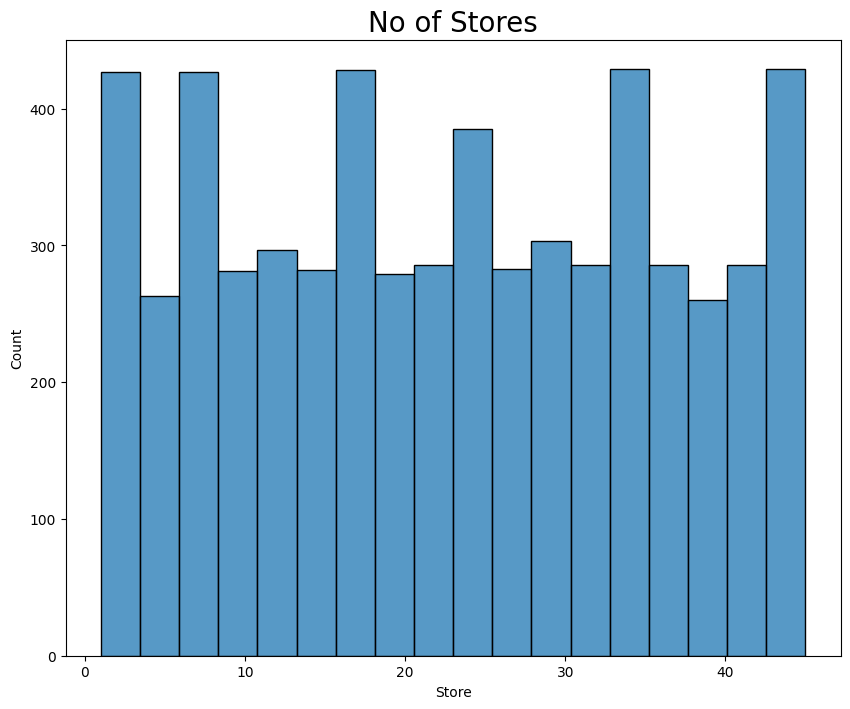

In [ ]:
# Store plotting...
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Store'])
plt.title('No of Stores',fontsize=20,)
plt.show()

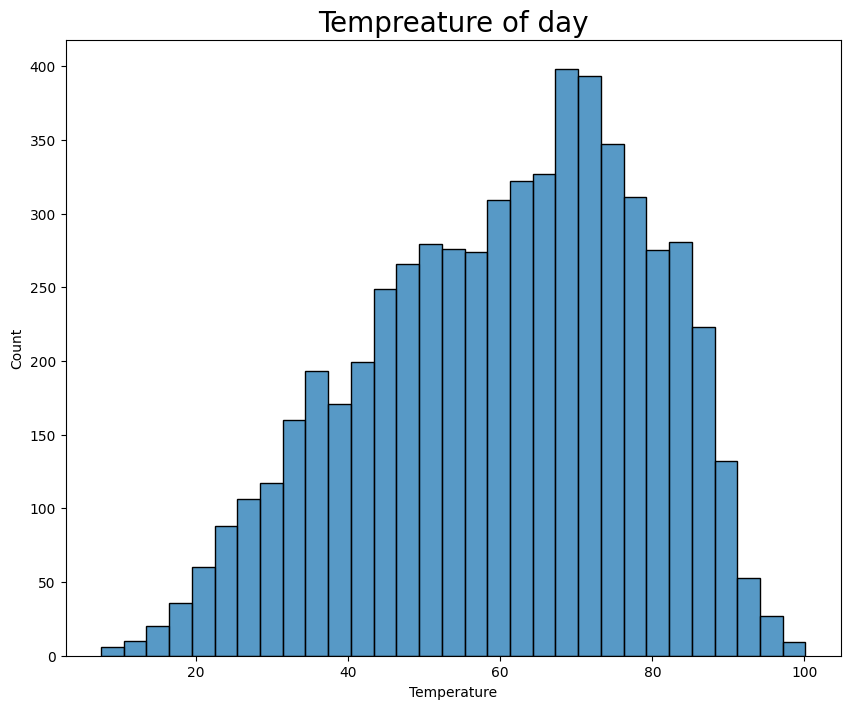

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Temperature'])
plt.title('Tempreature of day',fontsize=20,)
plt.show()

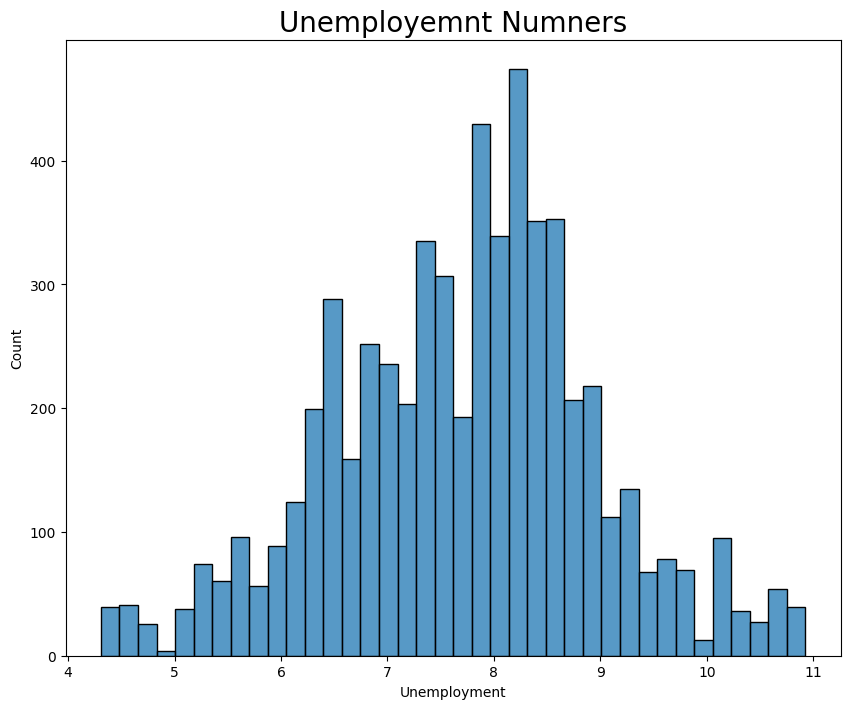

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Unemployment'])
plt.title('Unemployemnt Numners',fontsize=20,)
plt.show()

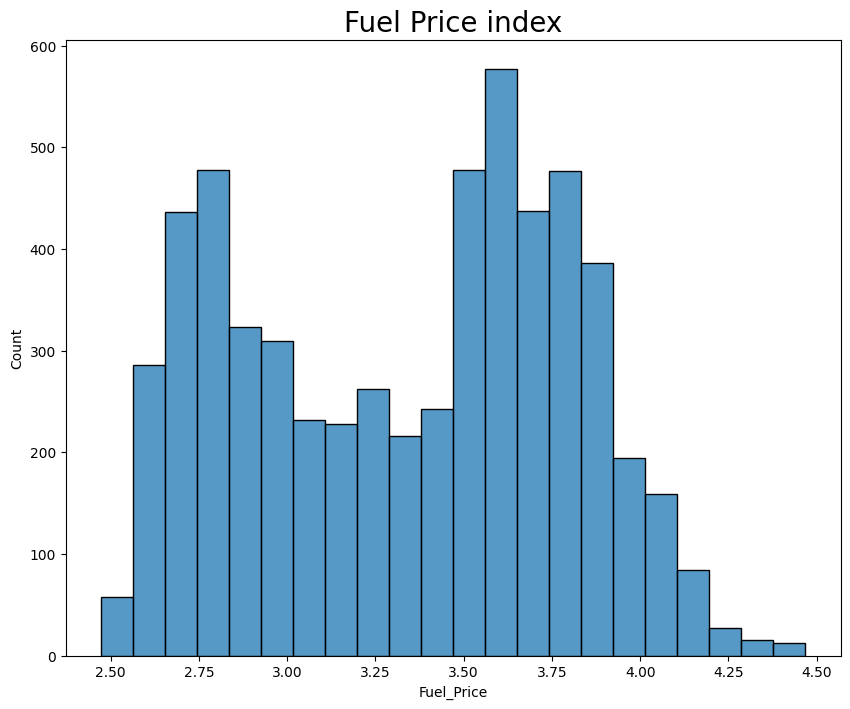

In [ ]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data['Fuel_Price'])
plt.title('Fuel Price index',fontsize=20,)
plt.show()

In [ ]:
# Overall Correlation with numerical data
data.corr()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
Store,1.000000,-0.319354,0.004289,-0.027045,0.047519,-0.208637,0.309645,0.003400,0.013566,-0.007421
Weekly_Sales,-0.319354,1.000000,0.024390,-0.041686,0.019664,-0.082977,-0.073092,-0.031838,0.042940,-0.021170
Holiday_Flag,0.004289,0.024390,1.000000,-0.157220,-0.076529,-0.000450,0.011031,0.040522,0.119797,-0.053861
Temperature,-0.027045,-0.041686,-0.157220,1.000000,0.145157,0.217847,0.024204,0.029903,0.244484,0.083390
Fuel_Price,0.047519,0.019664,-0.076529,0.145157,1.000000,-0.144515,-0.105214,0.032052,-0.029555,0.782957
CPI,-0.208637,-0.082977,-0.000450,0.217847,-0.144515,1.000000,-0.219020,0.004439,0.000345,0.086930
Unemployment,0.309645,-0.073092,0.011031,0.024204,-0.105214,-0.219020,1.000000,-0.000208,-0.009387,-0.242435
Day,0.003400,-0.031838,0.040522,0.029903,0.032052,0.004439,-0.000208,1.000000,0.008431,0.009835
Month,0.013566,0.042940,0.119797,0.244484,-0.029555,0.000345,-0.009387,0.008431,1.000000,-0.182152
year,-0.007421,-0.021170,-0.053861,0.083390,0.782957,0.086930,-0.242435,0.009835,-0.182152,1.000000


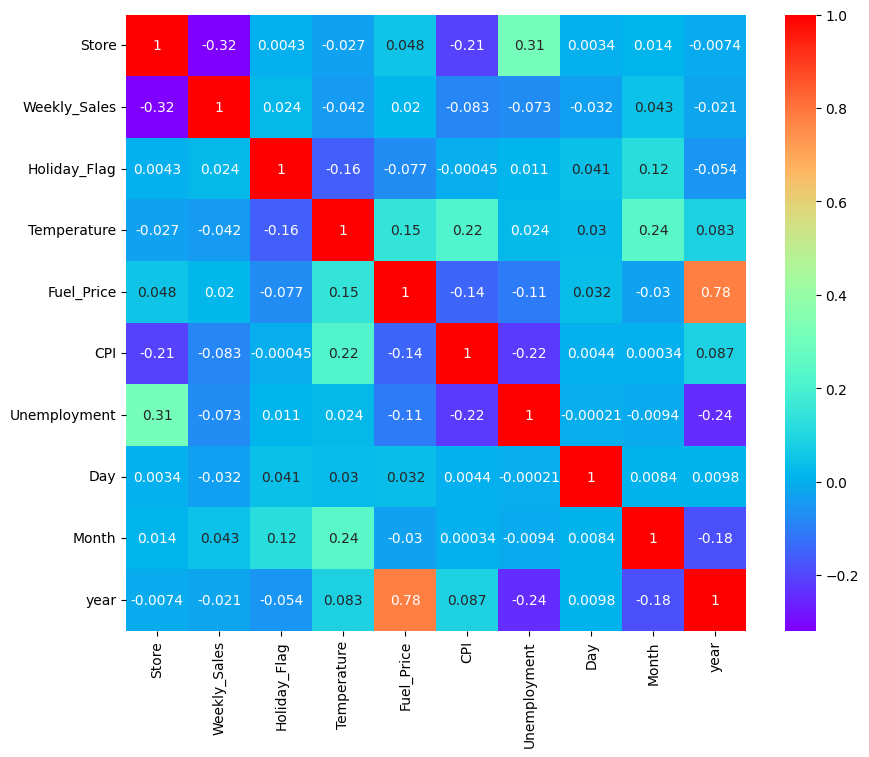

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True,cmap='rainbow')
plt.show()

In [ ]:
data.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,05,03,2010


#a. If the weekly sales are affected by the unemployment rate, if yes - which stores
#are suffering the most?

In [ ]:
total_sale = data.groupby('Weekly_Sales')[['Unemployment', 'Store']].sum().reset_index()
total_sale

,Weekly_Sales,Unemployment,Store
0,209986.25,9.265,33
1,213538.32,9.265,33
2,215359.21,8.010,33
3,219804.85,9.265,33
4,220060.35,8.010,33
...,...,...,...
5912,2627910.75,8.021,27
5913,2644633.02,6.551,6
5914,2658725.29,8.163,2
5915,2678206.42,8.067,19


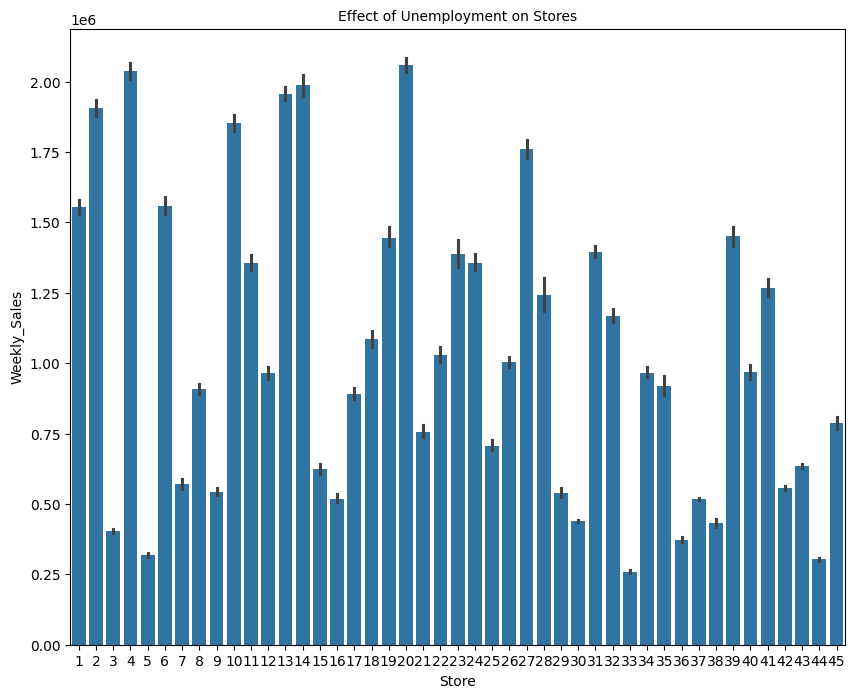

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x='Store',y='Weekly_Sales',data=total_sale)
plt.xlabel('Store',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Unemployment on Stores',fontsize=10)
plt.show()

# AS per above graph the Store # 33 is most afected store from unemployment....

b. If the weekly sales show a seasonal trend, when and what could be the reason?

In [ ]:
dt=pd.read_csv('/content/drive/MyDrive/Walmart.csv')
dt.head(2)

dt=dt.iloc[:,:3]
dt

dt.index=dt['Date']
dt.head()

,Store,Date,Weekly_Sales
Date,,,
05-02-2010,1,05-02-2010,1643690.90
12-02-2010,1,12-02-2010,1641957.44
19-02-2010,1,19-02-2010,1611968.17
26-02-2010,1,26-02-2010,1409727.59
05-03-2010,1,05-03-2010,1554806.68


<Axes: xlabel='Date'>

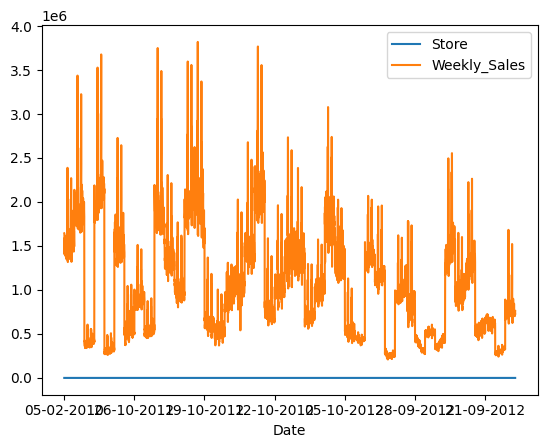

In [ ]:
dt.plot()


In [ ]:
# as per above graph data is looks Seasonaltrend

c. Does temperature affect the weekly sales in any manner?


In [ ]:
total_sale = data.groupby('Weekly_Sales')[['Temperature','Store','Day']].sum().reset_index()
total_sale

,Weekly_Sales,Temperature,Store,Day
0,209986.25,52.82,33,03
1,213538.32,71.34,33,29
2,215359.21,51.60,33,30
3,219804.85,52.91,33,31
4,220060.35,59.12,33,02
...,...,...,...,...
5912,2627910.75,46.67,27,26
5913,2644633.02,49.45,6,23
5914,2658725.29,62.98,2,26
5915,2678206.42,26.05,19,24


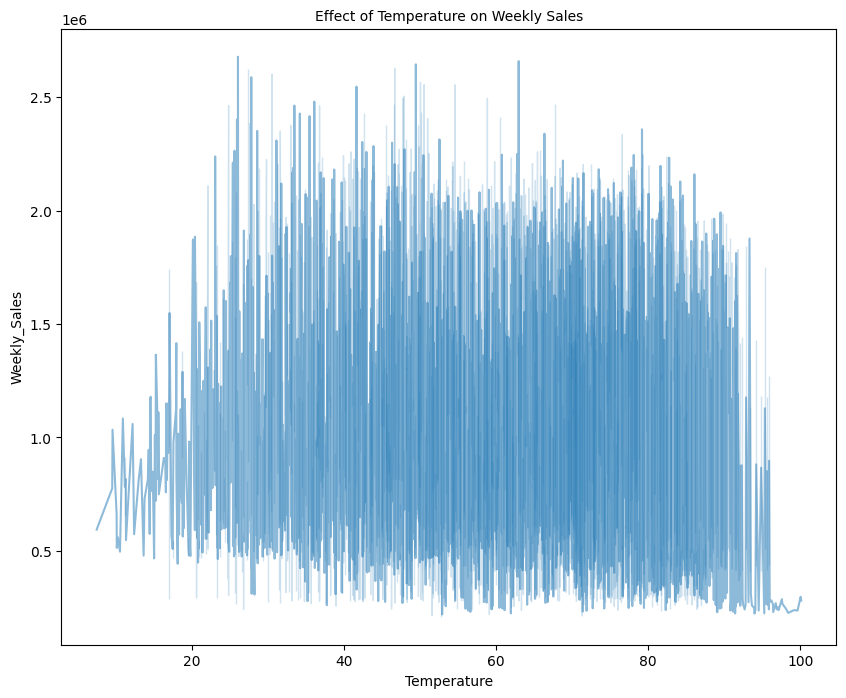

In [ ]:
plt.figure(figsize=(10,8))
sns.lineplot(x='Temperature',y='Weekly_Sales',data=data,alpha=0.5)
plt.xlabel('Temperature',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of Temperature on Weekly Sales',fontsize=10)
plt.show()

# AS per above graph we can see there not much impect of Tempreature on Weekly Sales...

d. How is the Consumer Price index affecting the weekly sales of various stores?

In [ ]:
Store_Avg = data.groupby('Store')[['CPI','Weekly_Sales']].mean().reset_index()
# This allows Pandas to correctly identify and select the desired columns for calculating the mean.
total_sale

,Weekly_Sales,Temperature,Store,Day
0,209986.25,52.82,33,03
1,213538.32,71.34,33,29
2,215359.21,51.60,33,30
3,219804.85,52.91,33,31
4,220060.35,59.12,33,02
...,...,...,...,...
5912,2627910.75,46.67,27,26
5913,2644633.02,49.45,6,23
5914,2658725.29,62.98,2,26
5915,2678206.42,26.05,19,24


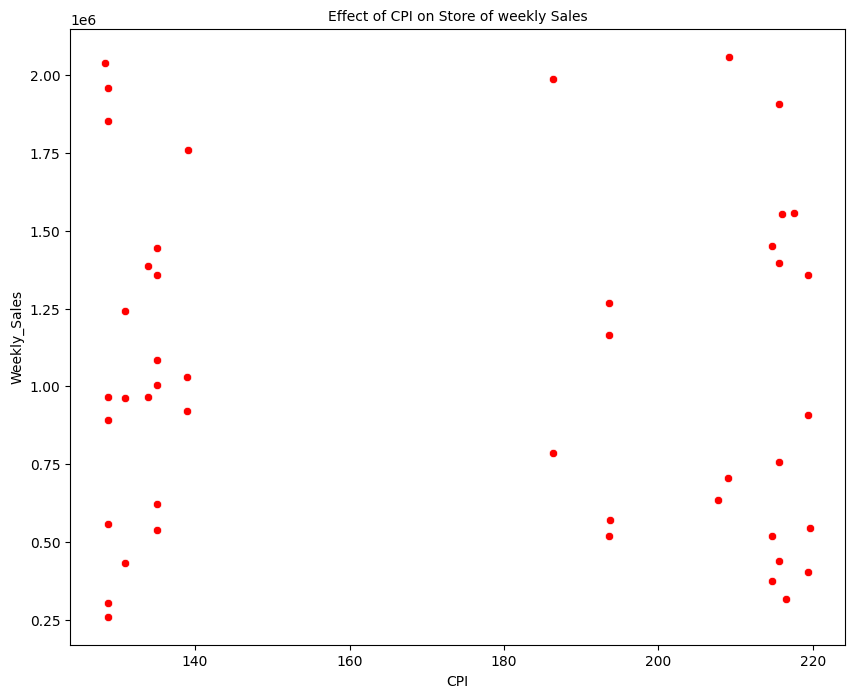

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='CPI',y='Weekly_Sales',data=Store_Avg,color='red')
plt.xlabel('CPI',fontsize=10)
plt.ylabel('Weekly_Sales',fontsize=10)
plt.title('Effect of CPI on Store of weekly Sales',fontsize=10)
plt.show()

In [ ]:
# Aper per above scatter graph thr relationship b/w Sore and CPI...

e. Top performing stores according to the historical data.


<Axes: title={'center': 'Total Sale for top performing store'}, xlabel='Store', ylabel='Weekly_Sales'>

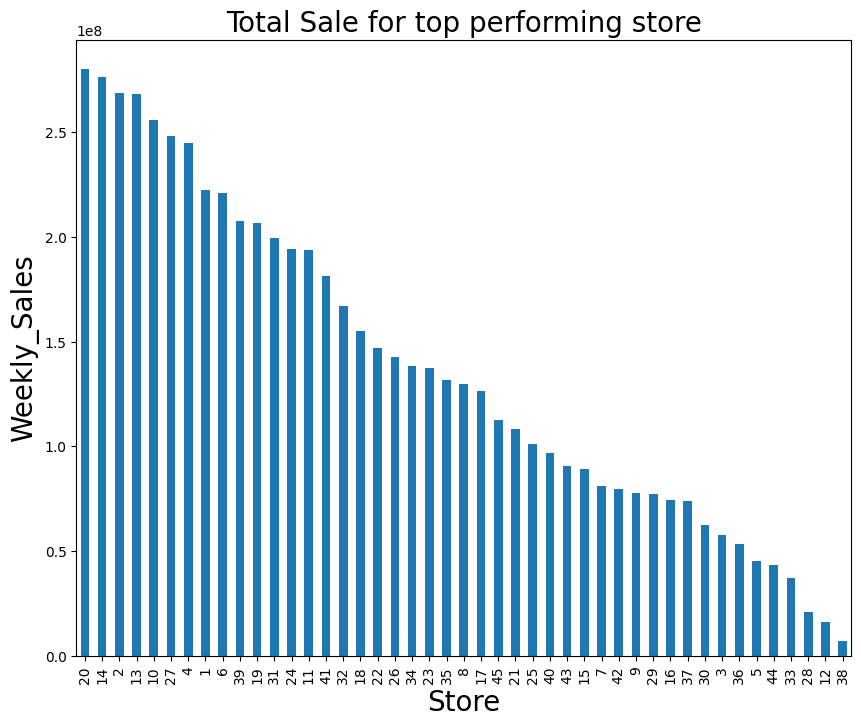

In [ ]:
import numpy as np
t_sale=data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
t_sale_array=np.array(t_sale)
plt.figure(figsize=(10,8))
plt.xticks(rotation=0)
plt.title('Total Sale for top performing store',fontsize=20)
plt.xlabel('Store',fontsize=20)
plt.ylabel('Weekly_Sales',fontsize=20)
t_sale.plot(kind='bar')

# As per above graph the top performing Store is Store#20

In [ ]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()
# Sort the store values
store_sale=store_sale.sort_values(ascending=False)

print("Top Performing Store:")

print("*********")
print(store_sale.head())

Top Performing Store:
*********
Store
20    2.800237e+08
14    2.761276e+08
2     2.687221e+08
13    2.682025e+08
10    2.556789e+08
Name: Weekly_Sales, dtype: float64


f. The worst performing store, and how significant is the difference between the
highest and lowest performing stores.


In [ ]:
store_sale=data.groupby('Store')['Weekly_Sales'].sum()


In [ ]:
worst_performing_sotre=store_sale.idxmin()
print(f"worst performing Store:{worst_performing_sotre}")
best_performing_sotre=store_sale.idxmax()
print(f"Best performing Store:{best_performing_sotre}")
Store_diff=store_sale.idxmax()-store_sale.idxmin()
print(f"Different Stores:{Store_diff}")


worst performing Store:38
Best performing Store:20
Different Stores:-18


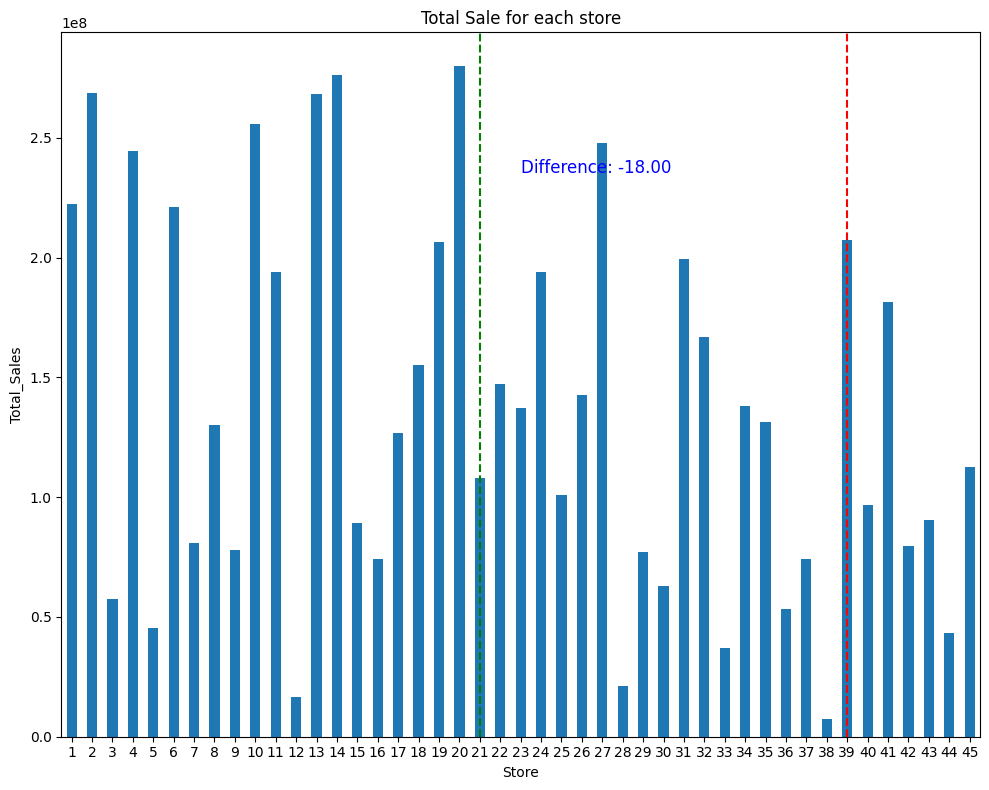

In [ ]:
plt.figure(figsize=(10,8))
store_sale.plot(kind='bar')
plt.xlabel('Store')
plt.ylabel('Total_Sales')
plt.title('Total Sale for each store')
plt.xticks(rotation=0)

plt.axvline(x=worst_performing_sotre,color='red',linestyle='--',label=worst_performing_sotre)
plt.axvline(x=best_performing_sotre,color='green',linestyle='--',label=best_performing_sotre)
plt.annotate(f'Difference: {Store_diff:.2f}', xy=(0.5, 0.8), xycoords='axes fraction', fontsize=12, color='blue')
plt.tight_layout()
plt.show()

# MOdeling...

In [ ]:
#importing Important Libraieies

from sklearn import model_selection
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

In [ ]:
#Data Spliting...

y=data.iloc[:,1:2]  #Independent Variables
x=data.iloc[:,0&1:] #Target Variables


In [ ]:
x=x.drop(['Weekly_Sales'],axis=1)

In [ ]:
x

,Store,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,year
0,1,0,42.31,2.572,211.096358,8.106,05,02,2010
1,1,1,38.51,2.548,211.242170,8.106,12,02,2010
2,1,0,39.93,2.514,211.289143,8.106,19,02,2010
3,1,0,46.63,2.561,211.319643,8.106,26,02,2010
4,1,0,46.50,2.625,211.350143,8.106,05,03,2010
...,...,...,...,...,...,...,...,...,...
6430,45,0,64.88,3.997,192.013558,8.684,28,09,2012
6431,45,0,64.89,3.985,192.170412,8.667,05,10,2012
6432,45,0,54.47,4.000,192.327265,8.667,12,10,2012
6433,45,0,56.47,3.969,192.330854,8.667,19,10,2012


In [ ]:
y

,Weekly_Sales
0,1643690.90
1,1641957.44
2,1611968.17
3,1409727.59
4,1554806.68
...,...
6430,713173.95
6431,733455.07
6432,734464.36
6433,718125.53


In [ ]:
#Date Spliting into Train and Test...

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4733, 9)
(1184, 9)
(4733, 1)
(1184, 1)


In [ ]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

* Linear Regression*

Train Accuracy Score: 0.1292126834186076
Test Accuracy Score: 0.1360999590666918
MSE: 272502807211.7445
MAE: 435060.42417295044
RMSE: 522018.01425979973


<Axes: xlabel='Weekly_Sales'>

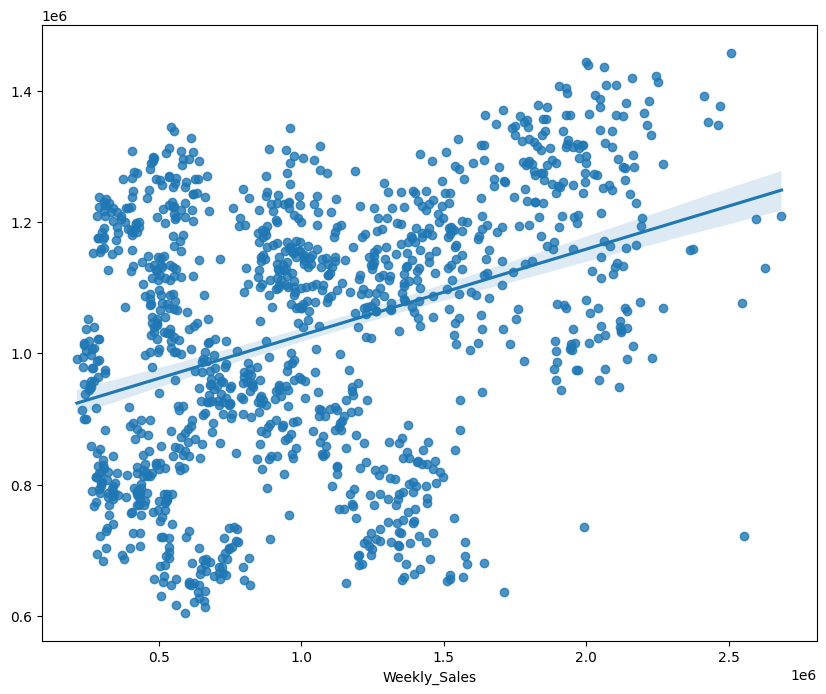

In [ ]:
# Linera Regression:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)

print('* Linear Regression*\n')

print('Train Accuracy Score:', lr.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,lr_pred))

print('MSE:',metrics.mean_squared_error(y_test,lr_pred))
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=lr_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


* Random Forest Regressor*

Train Accuracy Score: 0.994939637665113
Test Accuracy Score: 0.9697366494403263
MSE: 9546067360.101961
MAE: 53977.52022238176
RMSE: 97703.97822044895


<Axes: xlabel='Weekly_Sales'>

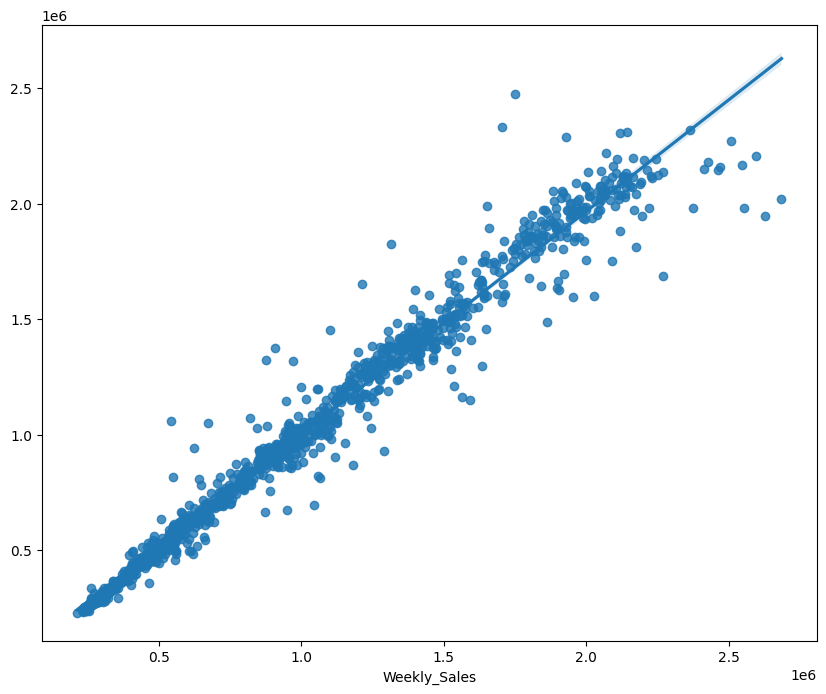

In [ ]:
# Random Forest


rdf=RandomForestRegressor()
rdf.fit(x_train,y_train)
rdf_pred=rdf.predict(x_test)

print('* Random Forest Regressor*\n')

print('Train Accuracy Score:', rdf.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,rdf_pred))

print('MSE:',metrics.mean_squared_error(y_test,rdf_pred))
print('MAE:',metrics.mean_absolute_error(y_test,rdf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rdf_pred)))

plt.figure(figsize=(10,8))
sns.regplot(x=y_test, y=rdf_pred)

* Decision Tree Regressor*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.9414630439665116
MSE: 18464502938.93142
MAE: 71105.04230574323
RMSE: 135884.15264088532


<Axes: xlabel='Weekly_Sales'>

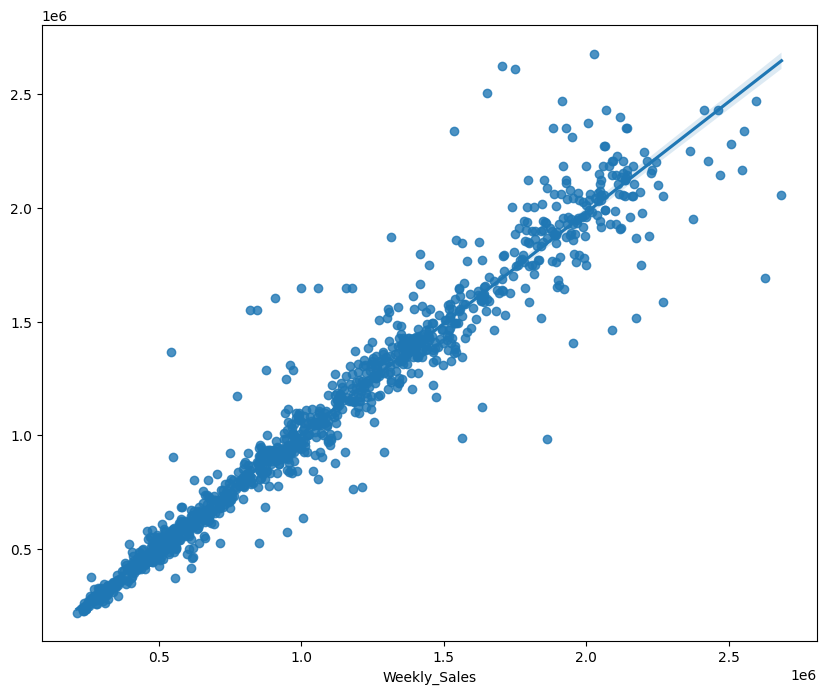

In [ ]:
# Decision Tree


dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)

print('* Decision Tree Regressor*\n')

print('Train Accuracy Score:', dt.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,dt_pred))

print('MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=dt_pred)

* KNearest Neighbors Regressor*

Train Accuracy Score: 1.0
Test Accuracy Score: 0.9396098332057569
MSE: 19049067252.778538
MAE: 71689.63358108109
RMSE: 138018.35839039146


<Axes: xlabel='Weekly_Sales'>

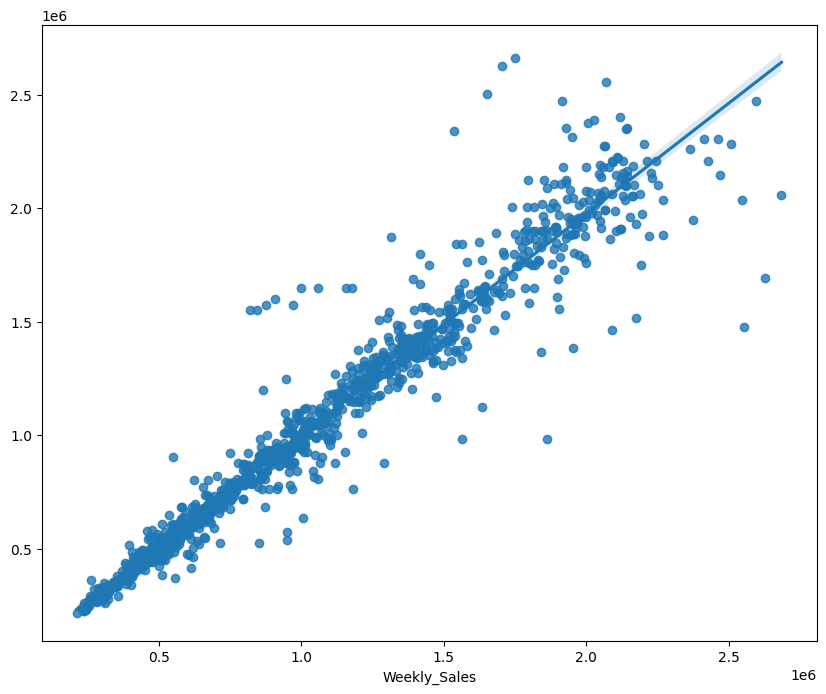

In [ ]:
#KNearest Neighbors


knn=DecisionTreeRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

print('* KNearest Neighbors Regressor*\n')

print('Train Accuracy Score:', knn.score(x_train,y_train))
print('Test Accuracy Score:', r2_score(y_test,knn_pred))

print('MSE:',metrics.mean_squared_error(y_test,knn_pred))
print('MAE:',metrics.mean_absolute_error(y_test,knn_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,knn_pred)))

plt.figure(figsize=(10,8))
sns.regplot(x=y_test,y=knn_pred)


In [ ]:
# Cross Validation...

# Linear Regression CV:

lr_scores=cross_val_score(lr,x_train,y_train,cv=10,scoring='r2')
print(lr_scores)
print('LinearRegression_Mean Score:',lr_scores.mean())


# Random Forest CV:

rdf_scores=cross_val_score(rdf,x_train,y_train,cv=10,scoring='r2')
print(rdf_scores)
print('RandomForest_Mean Score:',rdf_scores.mean())


# Decision Tree CV:

dt_scores=cross_val_score(dt,x_train,y_train,cv=10,scoring='r2')
print(dt_scores)
print('Decison_Mean Score:',dt_scores.mean())



# Knearest Neighbors CV:

knn_scores=cross_val_score(knn,x_train,y_train,cv=10,scoring='r2')
print(knn_scores)
print('Knn_Mean Score:',knn_scores.mean())


[0.13914735 0.13694998 0.10282754 0.12545706 0.08936086 0.13831518
 0.18760952 0.12384174 0.09625674 0.09252671]
LinearRegression_Mean Score: 0.12322926742153387


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

[0.97652564 0.96555072 0.95707604 0.95749098 0.94920612 0.97191825
 0.97610168 0.94891527 0.95974521 0.94812147]
RandomForest_Mean Score: 0.9610651369985626
[0.95521203 0.94794535 0.94116481 0.93584478 0.93326513 0.95511139
 0.96237824 0.92717286 0.94415711 0.92891409]
Decison_Mean Score: 0.943116578550039
[0.95768306 0.95046472 0.9398355  0.92351983 0.93181338 0.95466939
 0.96366953 0.92762826 0.94339829 0.92065374]
Knn_Mean Score: 0.94133357036924


In [ ]:
# Combines Score display...

print('LinearReg_Train Accuracy Score:', lr.score(x_train,y_train))
print('LinearRef_Test Accuracy Score:', r2_score(y_test,lr_pred))
print('LinearRegression_Mean Score:',lr_scores.mean())

print('************\n')

print('RandomForest_Train Accuracy Score:', rdf.score(x_train,y_train))
print('RandomForest_Test Accuracy Score:', r2_score(y_test,rdf_pred))
print('RandomForest_Mean Score:',rdf_scores.mean())

print('************\n')
print('DecisonTree_Train Accuracy Score:', dt.score(x_train,y_train))
print('DecisionTree_Test Accuracy Score:', r2_score(y_test,dt_pred))
print('Decison_Mean Score:',dt_scores.mean())



print('************\n')
print('knn_Train Accuracy Score:', knn.score(x_train,y_train))
print('Knn_Test Accuracy Score:', r2_score(y_test,knn_pred))
print('Knn_Mean Score:',knn_scores.mean())



LinearReg_Train Accuracy Score: 0.1292126834186076
LinearRef_Test Accuracy Score: 0.1360999590666918
LinearRegression_Mean Score: 0.12322926742153387
************

RandomForest_Train Accuracy Score: 0.994939637665113
RandomForest_Test Accuracy Score: 0.9697366494403263
RandomForest_Mean Score: 0.9610651369985626
************

DecisonTree_Train Accuracy Score: 1.0
DecisionTree_Test Accuracy Score: 0.9414630439665116
Decison_Mean Score: 0.943116578550039
************

knn_Train Accuracy Score: 1.0
Knn_Test Accuracy Score: 0.9396098332057569
Knn_Mean Score: 0.94133357036924


# As per above score RandomForest model is giving the higest score of 96% which is better than other models...

# MOdel Forcasting By Prophet Library...

2. Use predictive modeling techniques to forecast the sales for each store for the next 12
weeks

In [ ]:
#For forcasting we are using the Prophet Library...

import prophet

In [ ]:
from prophet import Prophet

In [ ]:
import os
os

<module 'os' from '/usr/lib/python3.10/os.py'>

In [ ]:
dt=pd.read_csv('/content/drive/MyDrive/Walmart.csv',parse_dates=['Date'])

In [ ]:
dt.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
Max_Sale=dt['Weekly_Sales'].max()
Max_Sale

3818686.45

In [ ]:
Min_Sale=dt['Weekly_Sales'].min()
Min_Sale

209986.25

In [ ]:
total_sale=dt.groupby('Date')['Weekly_Sales',].sum().reset_index()

In [ ]:
total_sale

,Date,Weekly_Sales
0,01-04-2011,43458991.19
1,01-06-2012,48281649.72
2,01-07-2011,47578519.50
3,01-10-2010,42239875.87
4,02-03-2012,46861034.97
...,...,...
138,30-07-2010,44630363.42
139,30-09-2011,42195830.81
140,30-12-2011,46042461.04
141,31-08-2012,47159639.43


In [ ]:
#In prohpet we need to give only 2 columns for forcasting..
total_sale.columns=['ds','y']
total_sale['ds']=pd.to_datetime(total_sale['ds'], format='%d-%m-%Y')

In [ ]:
total_sale

,ds,y
0,2010-01-10,42239875.87
1,2010-02-04,50423831.26
2,2010-02-07,48917484.50
3,2010-02-19,48276993.78
4,2010-02-26,43968571.13
...,...,...
138,2012-10-08,47403451.04
139,2012-10-19,45122410.57
140,2012-10-26,45544116.29
141,2012-11-05,46925878.99


In [ ]:
model=Prophet(interval_width=0.95) #Level of confidendce
model.fit(total_sale)
future=model.make_future_dataframe(periods=12)
future.tail(12)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq44yae4a/ub14b39b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpq44yae4a/bk0rkga5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=16870', 'data', 'file=/tmp/tmpq44yae4a/ub14b39b.json', 'init=/tmp/tmpq44yae4a/bk0rkga5.json', 'output', 'file=/tmp/tmpq44yae4a/prophet_modelod20tyvv/prophet_model-20241008060444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
143,2012-10-27
144,2012-10-28
145,2012-10-29
146,2012-10-30
147,2012-10-31
148,2012-11-01
149,2012-11-02
150,2012-11-03
151,2012-11-04
152,2012-11-05


In [ ]:
forcast=model.predict(future)
forcast.tail(12)
forcast[['ds','yhat','yhat_lower','yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
150,2012-11-03,4.688887e+07,4.018303e+07,5.394888e+07
151,2012-11-04,4.728298e+07,4.032323e+07,5.425284e+07
152,2012-11-05,4.769510e+07,4.093031e+07,5.457052e+07
153,2012-11-06,4.811919e+07,4.149123e+07,5.513067e+07
154,2012-11-07,4.854917e+07,4.154150e+07,5.505088e+07


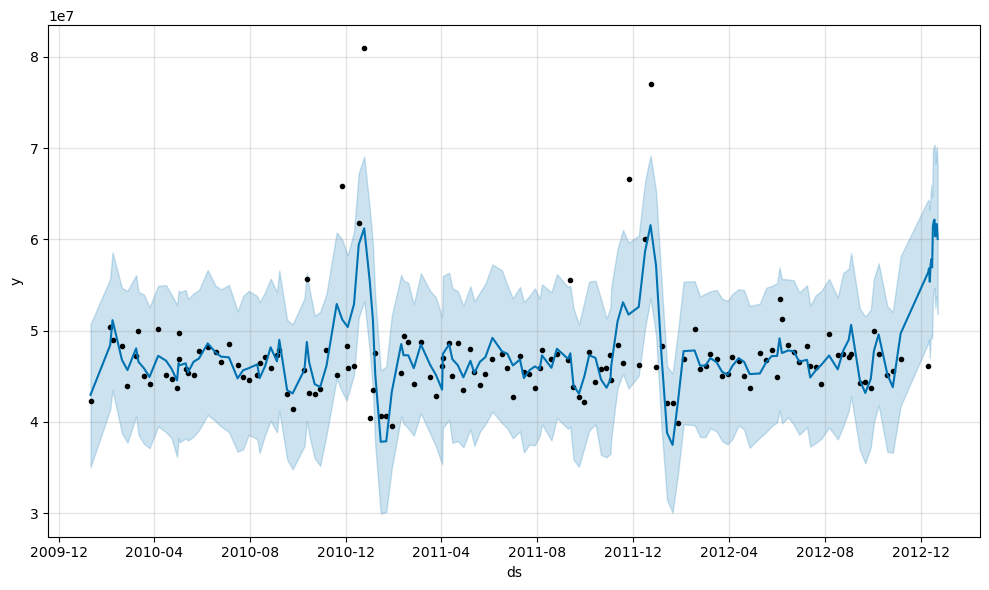

In [ ]:
total_sale_plot=model.plot(forcast)

The above graph is showing the future predicted values for 12 weeks

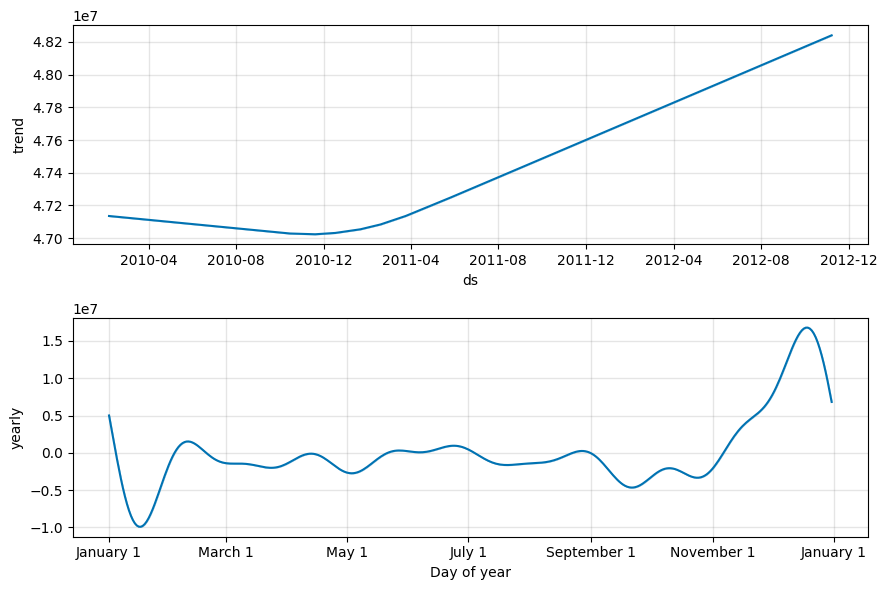

In [ ]:
total_sale_forcast_plot1=model.plot_components(forcast)